In [1]:
# Import required libraries
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('default')

import seaborn as sns
import datetime

import os
current_dir = os.getcwd()

from warnings import filterwarnings
filterwarnings("ignore")

from math import sqrt, floor
from statsmodels.formula import\
    api as sm
from scipy.stats import\
    ttest_ind as t_Test,\
    f_oneway as f_Test
from sklearn.metrics import\
    mean_squared_error as MSE,\
    mean_absolute_error as MAE,\
    r2_score as R2

<h2>Data Extraction</h2>

<h3>Get data e-Solat JAKIM saved in CSV</h3>

In [2]:
from missingno import matrix as MissingMatrix

In [3]:
csv_dir = current_dir + "\\data extraction and cleanup\\esolat2018to2025.csv"
esolatDF = pd.read_csv(csv_dir)

In [4]:
print(esolatDF.head())
print(esolatDF.tail())

         date      fajr      zuhr       asr   maghrib      isha
0  2018-01-01  05:58:00  13:19:00  16:42:00  19:16:00  20:30:00
1  2018-01-02  05:58:00  13:20:00  16:42:00  19:16:00  20:31:00
2  2018-01-03  05:59:00  13:20:00  16:43:00  19:17:00  20:31:00
3  2018-01-04  05:59:00  13:21:00  16:43:00  19:17:00  20:32:00
4  2018-01-05  06:00:00  13:21:00  16:44:00  19:18:00  20:32:00
            date      fajr      zuhr       asr   maghrib      isha
2917  2025-12-27  06:04:00  13:17:00  16:40:00  19:14:00  20:29:00
2918  2025-12-28  06:04:00  13:18:00  16:40:00  19:15:00  20:29:00
2919  2025-12-29  06:05:00  13:18:00  16:41:00  19:15:00  20:30:00
2920  2025-12-30  06:05:00  13:19:00  16:41:00  19:16:00  20:30:00
2921  2025-12-31  06:06:00  13:19:00  16:42:00  19:16:00  20:31:00


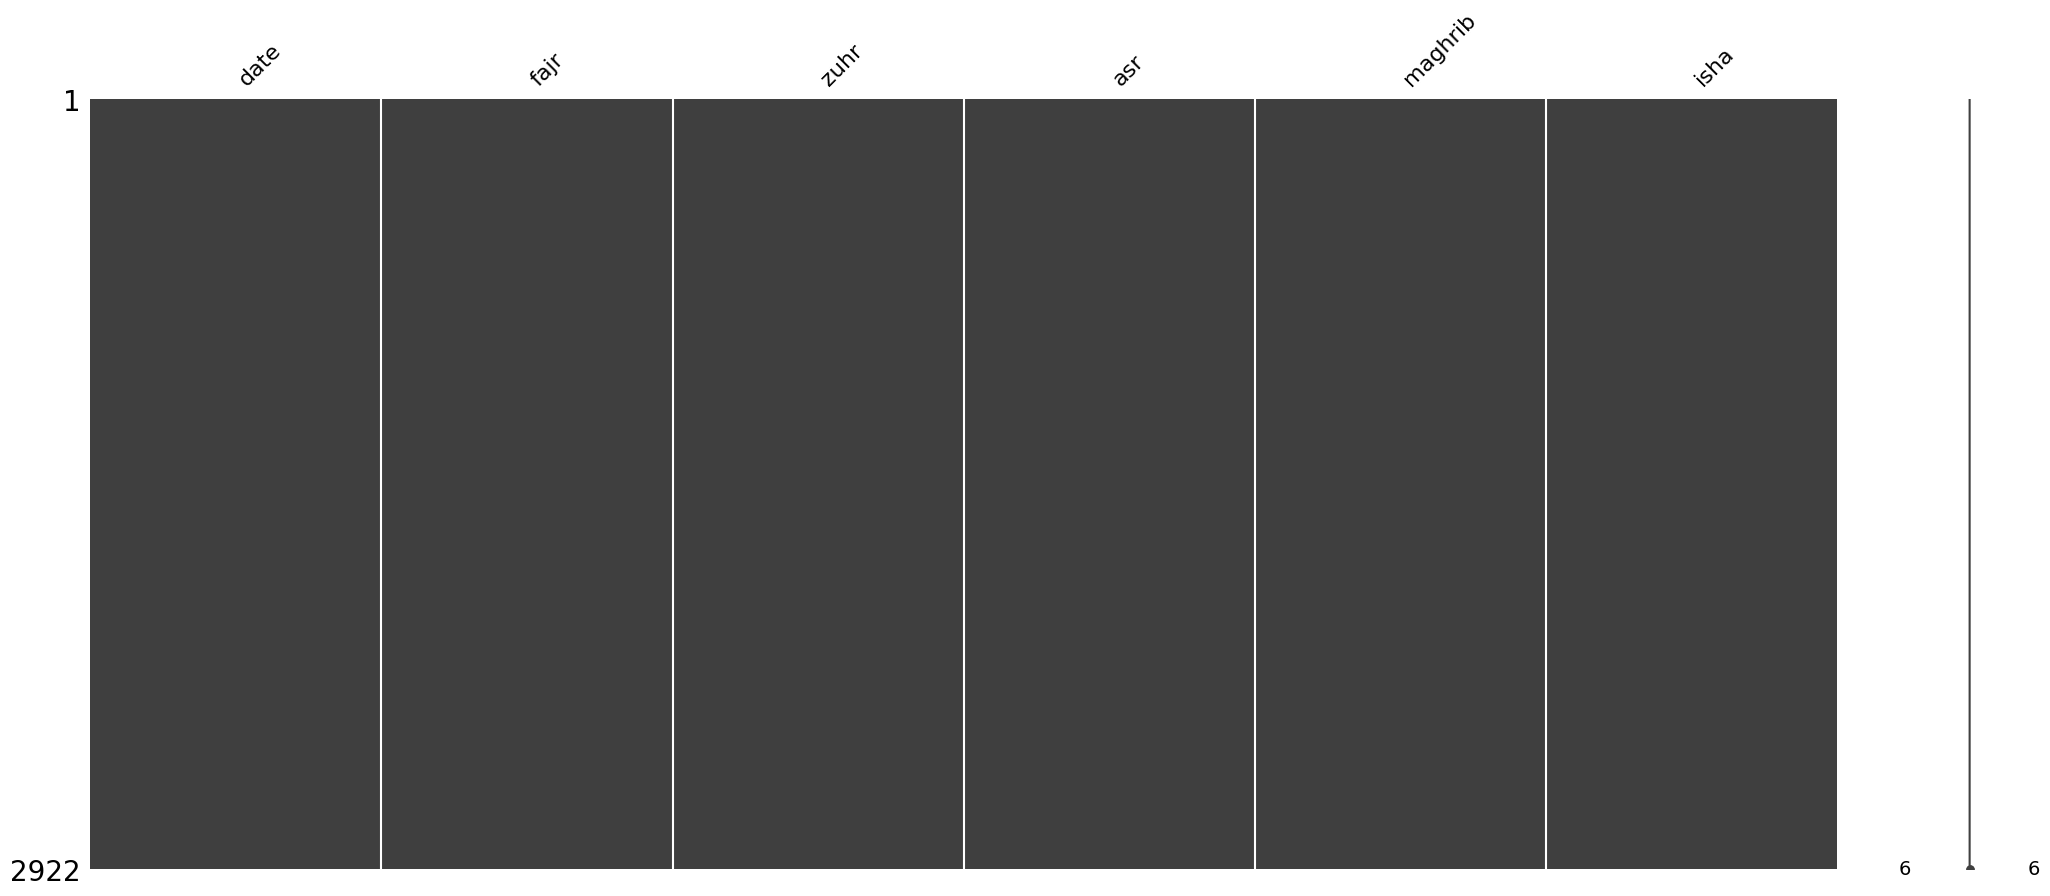

In [5]:
MissingMatrix(esolatDF)
plt.show()

In [6]:
esolatDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2922 entries, 0 to 2921
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   date     2922 non-null   object
 1   fajr     2922 non-null   object
 2   zuhr     2922 non-null   object
 3   asr      2922 non-null   object
 4   maghrib  2922 non-null   object
 5   isha     2922 non-null   object
dtypes: object(6)
memory usage: 137.1+ KB


In [7]:
for col in esolatDF.columns:
    print(type(esolatDF[col][0]))

<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>


<h3>Get data Google Search saved in TXT</h3>

In [8]:
txt_dir = current_dir + "\\data extraction and cleanup\\htmldata\\googlesearch_2024_12.txt"
googleDF = pd.read_html(txt_dir)[0]
googleDF[0][0] = "2024"
googleDF[3][0] = "Zuhr"
googleDF.columns = googleDF.iloc[0]
googleDF = googleDF[1:].reset_index(drop=True)

In [9]:
print(googleDF.head())
print(googleDF.tail())

0    2024   Fajr Sunrise   Zuhr    Asr Maghrib   Isha
0  30 Nov  05:52   07:03  13:03  16:27   19:02  20:16
1   1 Dec  05:52   07:04  13:03  16:27   19:02  20:16
2   2 Dec  05:52   07:04  13:04  16:28   19:02  20:17
3   3 Dec  05:53   07:05  13:04  16:28   19:03  20:17
4   4 Dec  05:53   07:05  13:04  16:29   19:03  20:17
0     2024   Fajr Sunrise   Zuhr    Asr Maghrib   Isha
27  27 Dec  06:03   07:16  13:15  16:39   19:14  20:29
28  28 Dec  06:04   07:17  13:16  16:40   19:14  20:29
29  29 Dec  06:04   07:17  13:16  16:40   19:15  20:30
30  30 Dec  06:05   07:17  13:17  16:41   19:15  20:30
31  31 Dec  06:05   07:18  13:17  16:41   19:16  20:30


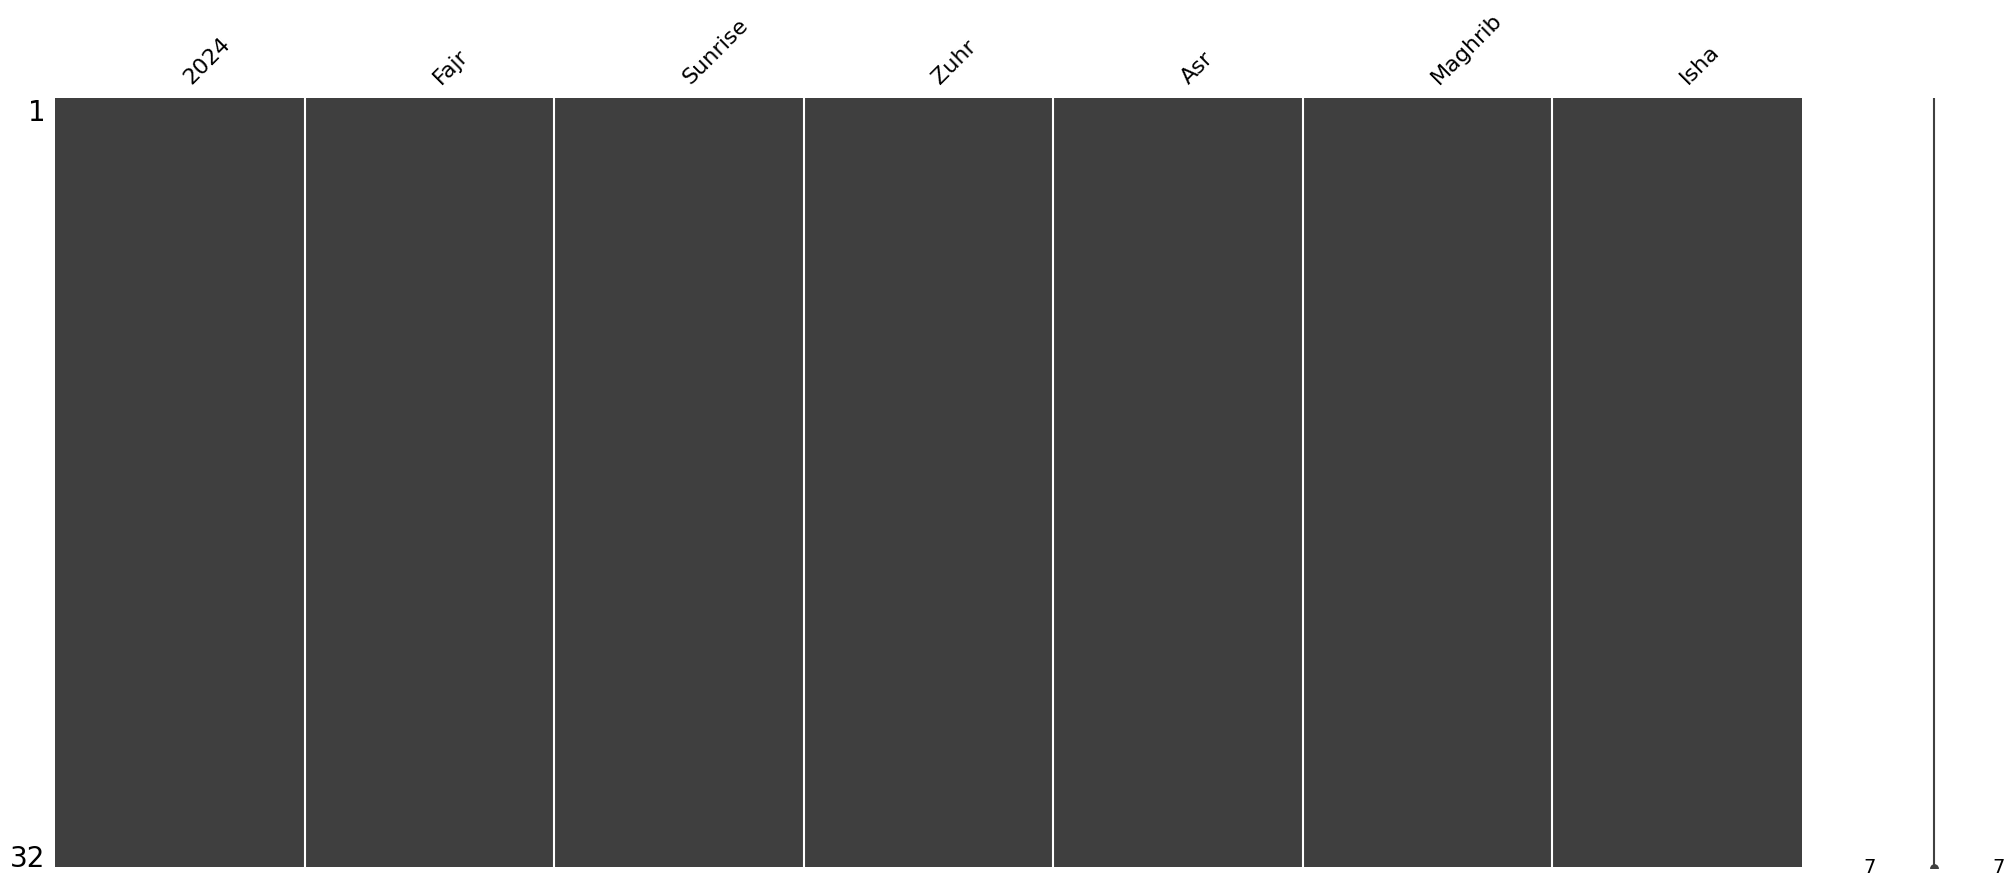

In [10]:
MissingMatrix(googleDF)
plt.show()

In [11]:
googleDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   2024     32 non-null     object
 1   Fajr     32 non-null     object
 2   Sunrise  32 non-null     object
 3   Zuhr     32 non-null     object
 4   Asr      32 non-null     object
 5   Maghrib  32 non-null     object
 6   Isha     32 non-null     object
dtypes: object(7)
memory usage: 1.9+ KB


In [12]:
for col in googleDF.columns:
    print(type(googleDF[col][0]))

<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>


<h2>Data Transformation</h2>

<h3>String to DateTime</h3>

In [13]:
esolatDate = pd.to_datetime(esolatDF["date"]).dt.date
esolatFajr = pd.to_datetime(esolatDF["fajr"], format="%H:%M:%S").dt.time
esolatZuhr = pd.to_datetime(esolatDF["zuhr"], format="%H:%M:%S").dt.time
esolatAsr = pd.to_datetime(esolatDF["asr"], format="%H:%M:%S").dt.time
esolatMaghrib = pd.to_datetime(esolatDF["maghrib"], format="%H:%M:%S").dt.time
esolatIsha = pd.to_datetime(esolatDF["isha"], format="%H:%M:%S").dt.time
copiedEsolatDF = pd.DataFrame([esolatDate,esolatFajr,esolatZuhr,esolatAsr,esolatMaghrib,esolatIsha]).transpose()

In [14]:
print(copiedEsolatDF.head())
print(copiedEsolatDF.tail())

         date      fajr      zuhr       asr   maghrib      isha
0  2018-01-01  05:58:00  13:19:00  16:42:00  19:16:00  20:30:00
1  2018-01-02  05:58:00  13:20:00  16:42:00  19:16:00  20:31:00
2  2018-01-03  05:59:00  13:20:00  16:43:00  19:17:00  20:31:00
3  2018-01-04  05:59:00  13:21:00  16:43:00  19:17:00  20:32:00
4  2018-01-05  06:00:00  13:21:00  16:44:00  19:18:00  20:32:00
            date      fajr      zuhr       asr   maghrib      isha
2917  2025-12-27  06:04:00  13:17:00  16:40:00  19:14:00  20:29:00
2918  2025-12-28  06:04:00  13:18:00  16:40:00  19:15:00  20:29:00
2919  2025-12-29  06:05:00  13:18:00  16:41:00  19:15:00  20:30:00
2920  2025-12-30  06:05:00  13:19:00  16:41:00  19:16:00  20:30:00
2921  2025-12-31  06:06:00  13:19:00  16:42:00  19:16:00  20:31:00


In [15]:
googleDate = pd.to_datetime(googleDF["2024"].astype(str) + " 2024", format="%d %b %Y").dt.date
googleFajr = pd.to_datetime(googleDF["Fajr"], format="%H:%M").dt.time
googleZuhr = pd.to_datetime(googleDF["Zuhr"], format="%H:%M").dt.time
googleAsr = pd.to_datetime(googleDF["Asr"], format="%H:%M").dt.time
googleMaghrib = pd.to_datetime(googleDF["Maghrib"], format="%H:%M").dt.time
googleIsha = pd.to_datetime(googleDF["Isha"], format="%H:%M").dt.time
copiedGoogleDF = pd.DataFrame([googleDate,googleFajr,googleZuhr,googleAsr,googleMaghrib,googleIsha]).transpose()

In [16]:
print(copiedGoogleDF.head())
print(copiedGoogleDF.tail())

         2024      Fajr      Zuhr       Asr   Maghrib      Isha
0  2024-11-30  05:52:00  13:03:00  16:27:00  19:02:00  20:16:00
1  2024-12-01  05:52:00  13:03:00  16:27:00  19:02:00  20:16:00
2  2024-12-02  05:52:00  13:04:00  16:28:00  19:02:00  20:17:00
3  2024-12-03  05:53:00  13:04:00  16:28:00  19:03:00  20:17:00
4  2024-12-04  05:53:00  13:04:00  16:29:00  19:03:00  20:17:00
          2024      Fajr      Zuhr       Asr   Maghrib      Isha
27  2024-12-27  06:03:00  13:15:00  16:39:00  19:14:00  20:29:00
28  2024-12-28  06:04:00  13:16:00  16:40:00  19:14:00  20:29:00
29  2024-12-29  06:04:00  13:16:00  16:40:00  19:15:00  20:30:00
30  2024-12-30  06:05:00  13:17:00  16:41:00  19:15:00  20:30:00
31  2024-12-31  06:05:00  13:17:00  16:41:00  19:16:00  20:30:00


<h3>Total Minutes Integer</h3>

In [17]:
def transformTimeToTotalMins(col_df = []):
    col = []

    if (len(col_df) > 0):
        for i in range(len(col_df)):
            t = col_df[i]
            col.append(t.hour * 60 + t.minute)
        
    return col

def transformTotalMinsToTime(col_df = []):
    col = []
    
    if (len(col_df) > 0):
        for i in range(len(col_df)):
            m = col_df[i]
            t = (str(floor(m / 60)) + ":" + str(m % 60))
            col.append(pd.Timestamp(t).time())
    return col

In [18]:
copiedEsolatDF2 = copiedEsolatDF.copy()
copiedEsolatDF2["fajr"] = transformTimeToTotalMins(copiedEsolatDF2["fajr"])
copiedEsolatDF2["zuhr"] = transformTimeToTotalMins(copiedEsolatDF2["zuhr"])
copiedEsolatDF2["asr"] = transformTimeToTotalMins(copiedEsolatDF2["asr"])
copiedEsolatDF2["maghrib"] = transformTimeToTotalMins(copiedEsolatDF2["maghrib"])
copiedEsolatDF2["isha"] = transformTimeToTotalMins(copiedEsolatDF2["isha"])

In [19]:
print(copiedEsolatDF2.head())
print(copiedEsolatDF2.tail())

         date  fajr  zuhr   asr  maghrib  isha
0  2018-01-01   358   799  1002     1156  1230
1  2018-01-02   358   800  1002     1156  1231
2  2018-01-03   359   800  1003     1157  1231
3  2018-01-04   359   801  1003     1157  1232
4  2018-01-05   360   801  1004     1158  1232
            date  fajr  zuhr   asr  maghrib  isha
2917  2025-12-27   364   797  1000     1154  1229
2918  2025-12-28   364   798  1000     1155  1229
2919  2025-12-29   365   798  1001     1155  1230
2920  2025-12-30   365   799  1001     1156  1230
2921  2025-12-31   366   799  1002     1156  1231


In [20]:
copiedGoogleDF2 = copiedGoogleDF.copy()
copiedGoogleDF2["Fajr"] = transformTimeToTotalMins(copiedGoogleDF2["Fajr"])
copiedGoogleDF2["Zuhr"] = transformTimeToTotalMins(copiedGoogleDF2["Zuhr"])
copiedGoogleDF2["Asr"] = transformTimeToTotalMins(copiedGoogleDF2["Asr"])
copiedGoogleDF2["Maghrib"] = transformTimeToTotalMins(copiedGoogleDF2["Maghrib"])
copiedGoogleDF2["Isha"] = transformTimeToTotalMins(copiedGoogleDF2["Isha"])

In [21]:
print(copiedGoogleDF2.head())
print(copiedGoogleDF2.tail())

         2024  Fajr  Zuhr  Asr  Maghrib  Isha
0  2024-11-30   352   783  987     1142  1216
1  2024-12-01   352   783  987     1142  1216
2  2024-12-02   352   784  988     1142  1217
3  2024-12-03   353   784  988     1143  1217
4  2024-12-04   353   784  989     1143  1217
          2024  Fajr  Zuhr   Asr  Maghrib  Isha
27  2024-12-27   363   795   999     1154  1229
28  2024-12-28   364   796  1000     1154  1229
29  2024-12-29   364   796  1000     1155  1230
30  2024-12-30   365   797  1001     1155  1230
31  2024-12-31   365   797  1001     1156  1230


<h2>Data Distribution</h2>

In [22]:
def plot_dist(df, cols):
    if (len(cols) == 0):
        return print("No data to plot")
    
    sns.pairplot(df, vars=cols, markers=".")
    plt.show()

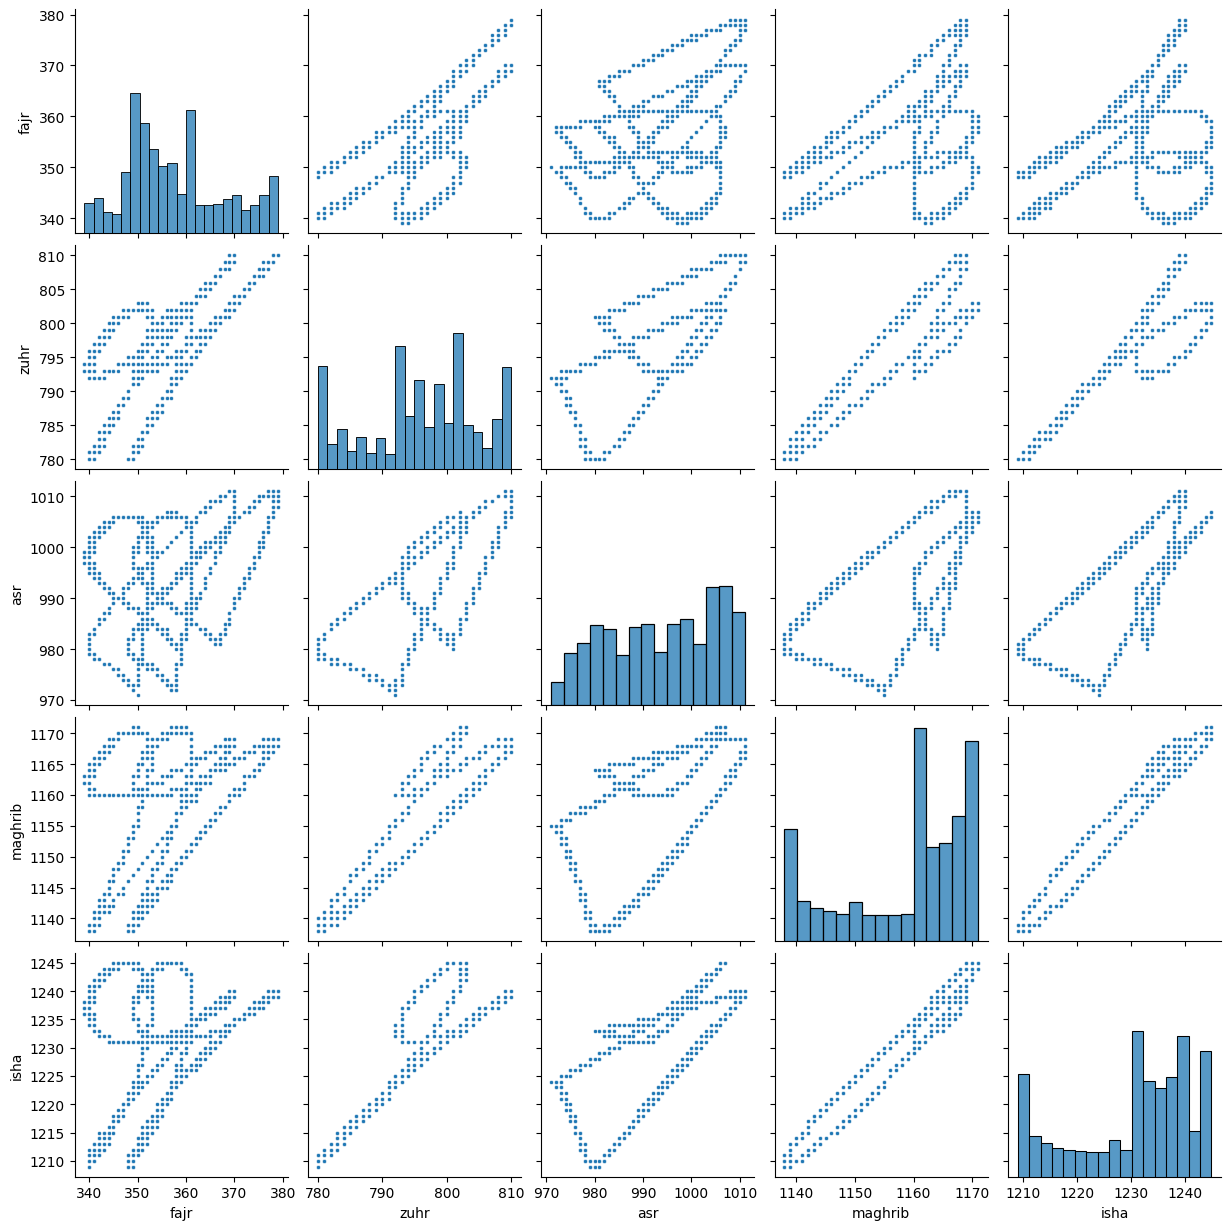

In [23]:
plot_dist(copiedEsolatDF2, ["fajr","zuhr","asr","maghrib","isha"])

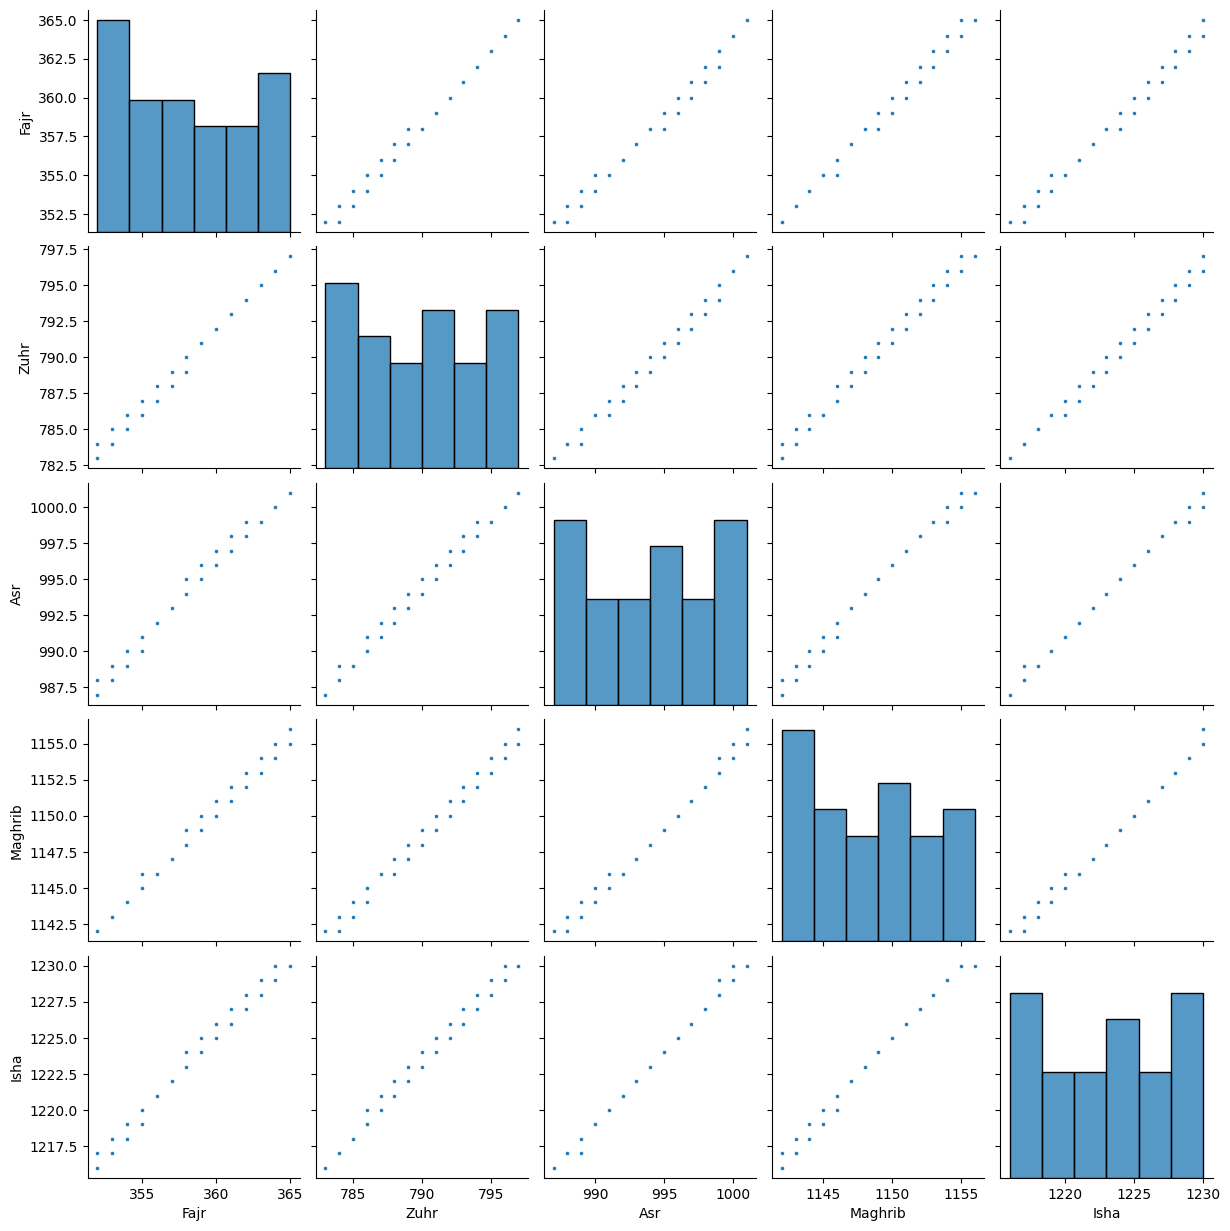

In [24]:
plot_dist(copiedGoogleDF2, ["Fajr","Zuhr","Asr","Maghrib","Isha"])

<h2>Objective 1</h2>

In [25]:
combine = copiedGoogleDF2.merge(copiedEsolatDF2, left_on="2024", right_on="date")

compareFajr = combine["fajr"] - combine["Fajr"]
compareZuhr = combine["zuhr"] - combine["Zuhr"]
compareAsr = combine["asr"] - combine["Asr"]
compareMaghrib = combine["maghrib"] - combine["Maghrib"]
compareIsha = combine["isha"] - combine["Isha"]

compareDF = pd.DataFrame([combine["date"],compareFajr,compareZuhr,compareAsr,compareMaghrib,compareIsha]).transpose()
compareDF.columns = ["date","diff_fajr","diff_zuhr","diff_asr","diff_maghrib","diff_isha"]

In [26]:
compareDF

,date,diff_fajr,diff_zuhr,diff_asr,diff_maghrib,diff_isha
0,2024-11-30,0,2,0,0,0
1,2024-12-01,0,2,1,0,1
2,2024-12-02,1,1,0,1,0
3,2024-12-03,0,2,0,0,0
4,2024-12-04,0,2,0,1,1
5,2024-12-05,1,2,0,1,0
6,2024-12-06,0,2,1,0,1
7,2024-12-07,1,2,0,1,0
8,2024-12-08,0,2,1,0,1
9,2024-12-09,0,2,0,1,0


<h2>Objective 2</h2>

<h3>Time Series Plots</h3>

In [27]:
def plot_time_series():
	f, ax = plt.subplots(nrows=5, ncols=1, sharex=True, figsize=(20,12))
	f.suptitle("Time series of prayer times (Source: e-Solat JAKIM) in 2018-2025, total minutes", fontsize=15)

	copiedEsolatDF2.plot(x="date", y="fajr", kind="line", ax=ax[0], linewidth=1, color="C0")
	copiedEsolatDF2.plot(x="date", y="zuhr", kind="line", ax=ax[1], linewidth=1, color="C1")
	copiedEsolatDF2.plot(x="date", y="asr", kind="line", ax=ax[2], linewidth=1, color="C2")
	copiedEsolatDF2.plot(x="date", y="maghrib", kind="line", ax=ax[3], linewidth=1, color="C3")
	copiedEsolatDF2.plot(x="date", y="isha", kind="line", ax=ax[4], linewidth=1, color="C4")

	for i in range(5):
		ax[i].set_ylabel("Total Minutes")

	ax[4].set_xlabel("Date/Year")
	plt.show()

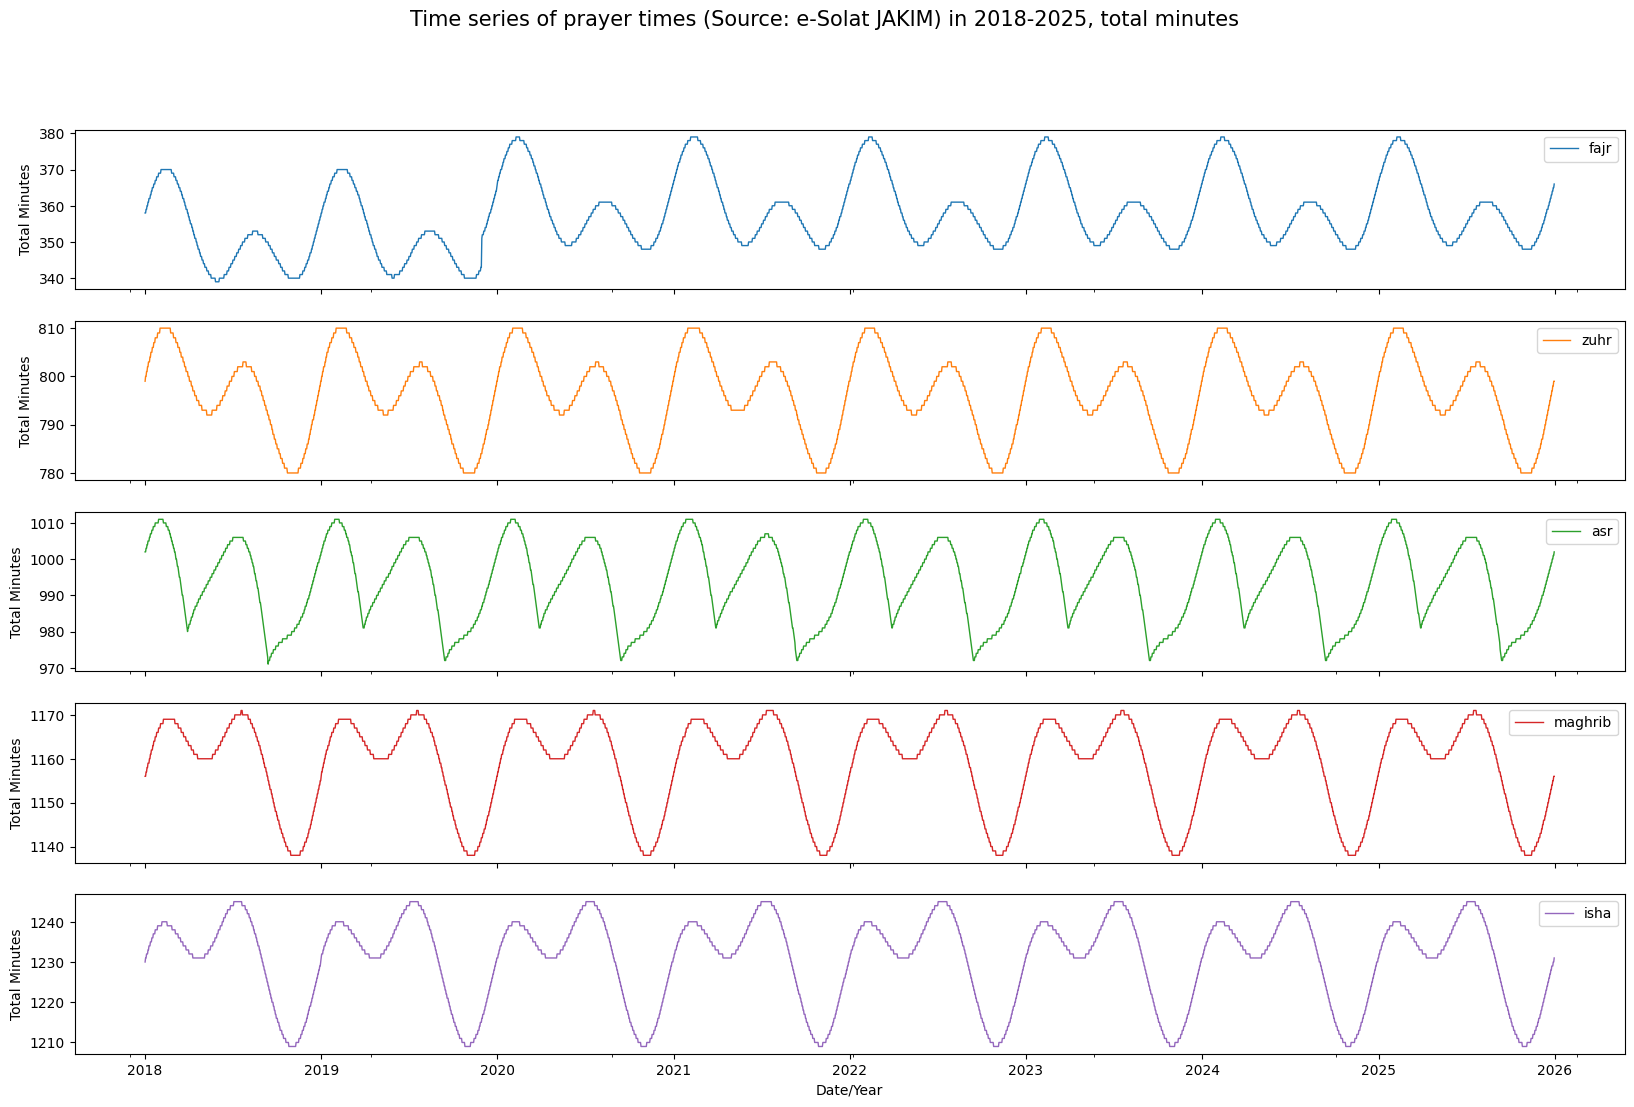

In [28]:
plot_time_series()

In [29]:
copiedEsolatDF2["fajr"] = np.where(\
    copiedEsolatDF2["date"] < datetime.date(2019, 11, 30),\
    copiedEsolatDF2["fajr"] + 8,\
    copiedEsolatDF2["fajr"]\
)

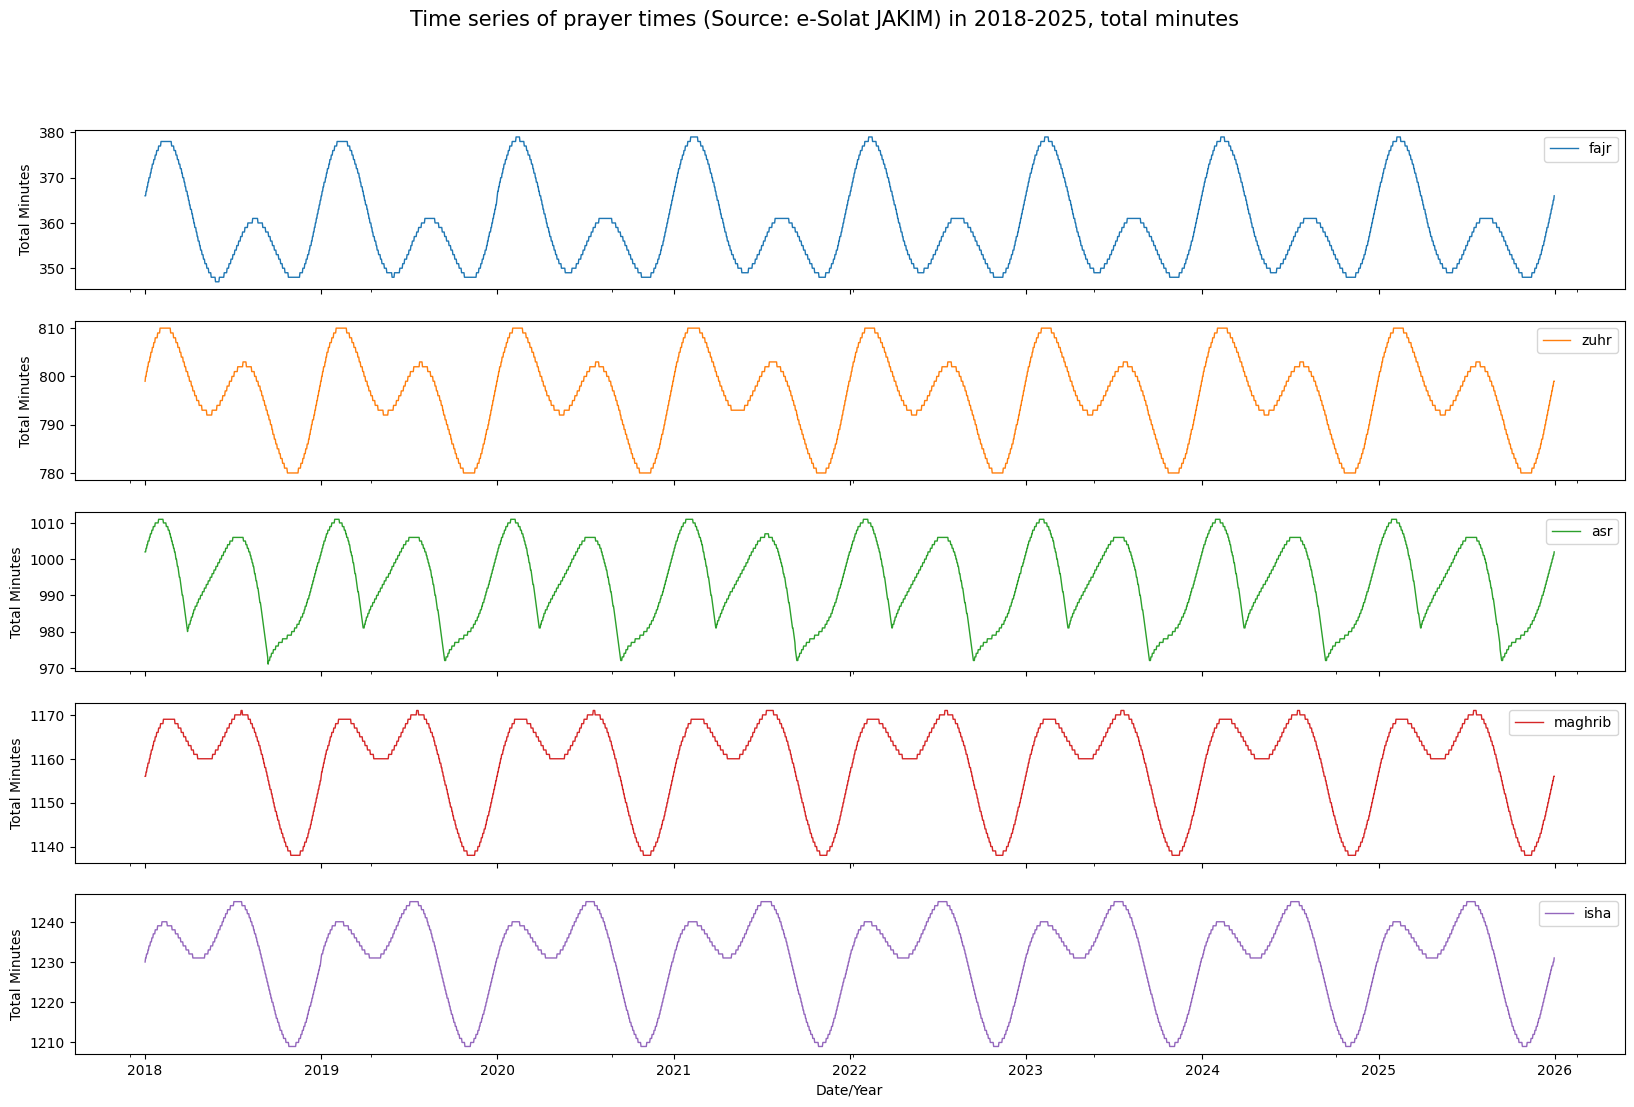

In [30]:
plot_time_series()

<h3>Exploratory Data Analysis (EDA)</h3>

In [31]:
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller as ADF
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

<h4>Time Series Decomposition Charts</h4>

In [32]:
# Time Series Decomposition Charts
def decompose_time_series_charts(col_name):
    if col_name not in copiedEsolatDF2.columns:
        return
    
    decomp = seasonal_decompose(copiedEsolatDF2[col_name], period=365, model="additive", extrapolate_trend="freq")

    f, ax = plt.subplots(nrows=4, ncols=1, sharex=True, figsize=(20,12))
    f.suptitle(f"Decomposition of {col_name}", fontsize=15)
    
    decomp.observed.plot(ax=ax[0], legend=False, color="C0", linewidth=1)
    ax[0].set_ylabel("Observed/Actual")

    decomp.trend.plot(ax=ax[1], legend=False, color="C1", linewidth=1)
    ax[1].set_ylabel("Trend")

    decomp.seasonal.plot(ax=ax[2], legend=False, color="C2", linewidth=1)
    ax[2].set_ylabel("Seasonal")

    decomp.resid.plot(ax=ax[3], legend=False, color="C3", linewidth=1)
    ax[3].set_ylabel("Residual/Noise")

    plt.xticks()
    ax[3].set_xlabel("Time Progress")
    plt.show()

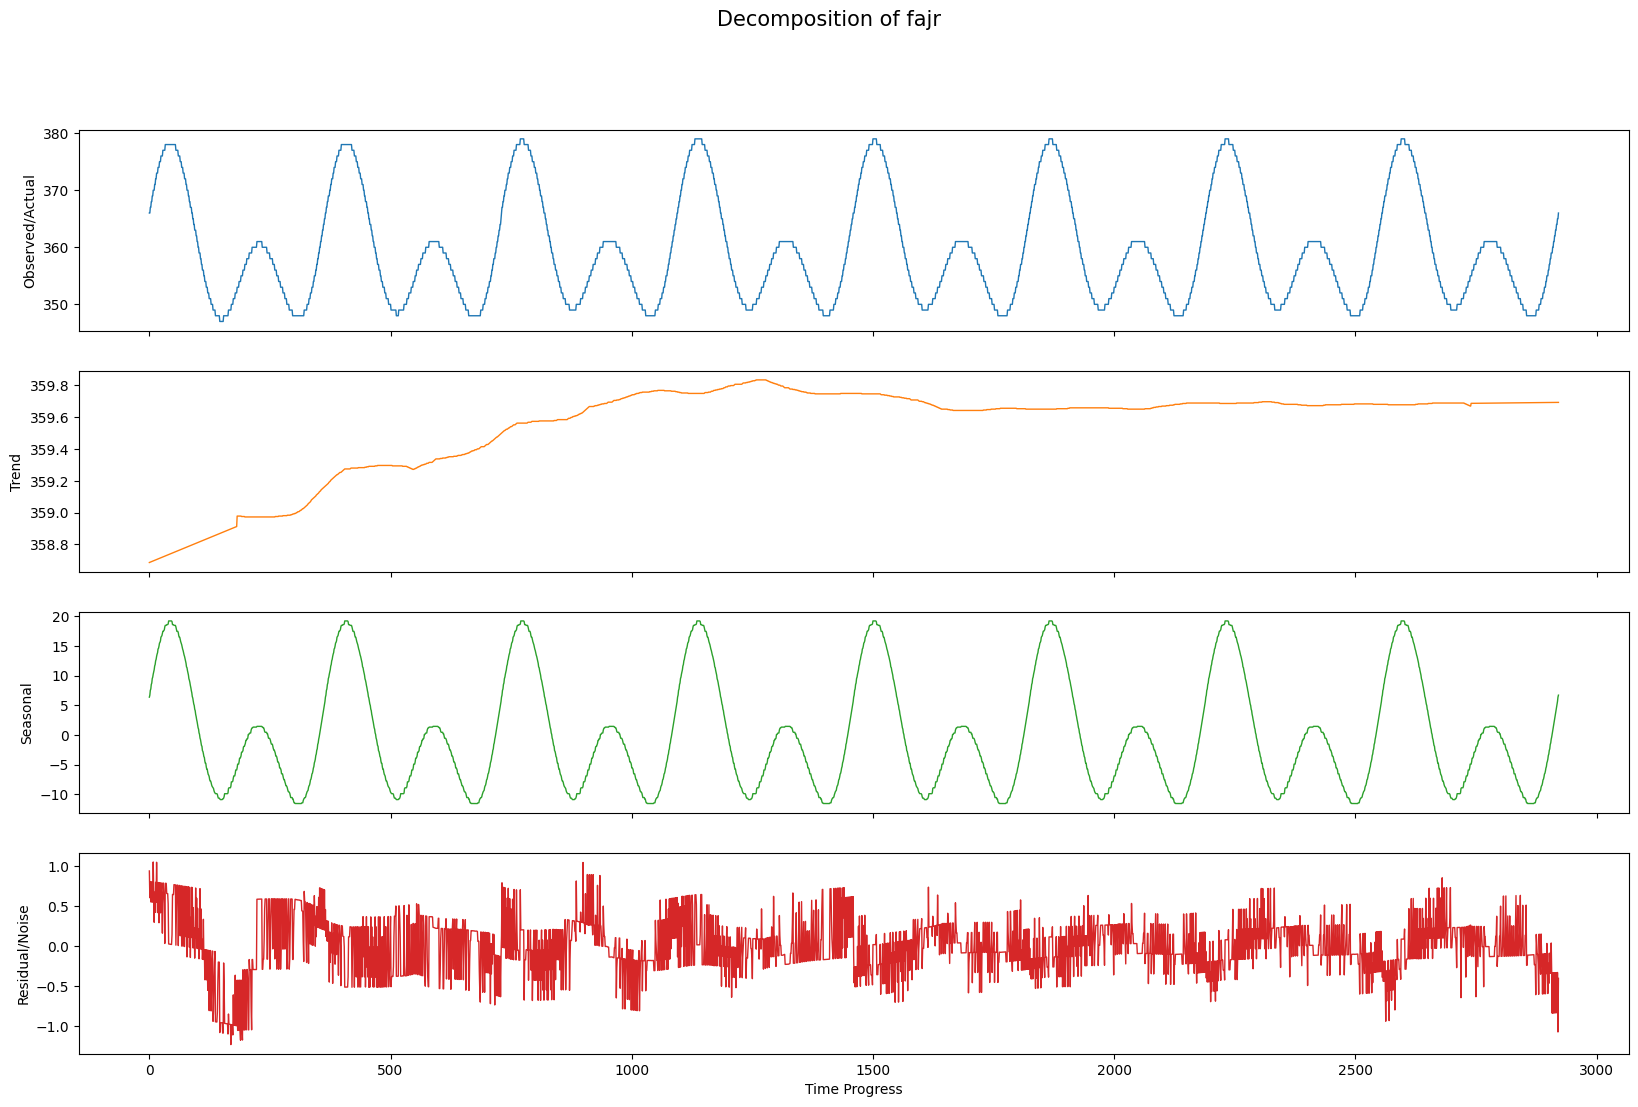

In [33]:
decompose_time_series_charts("fajr")

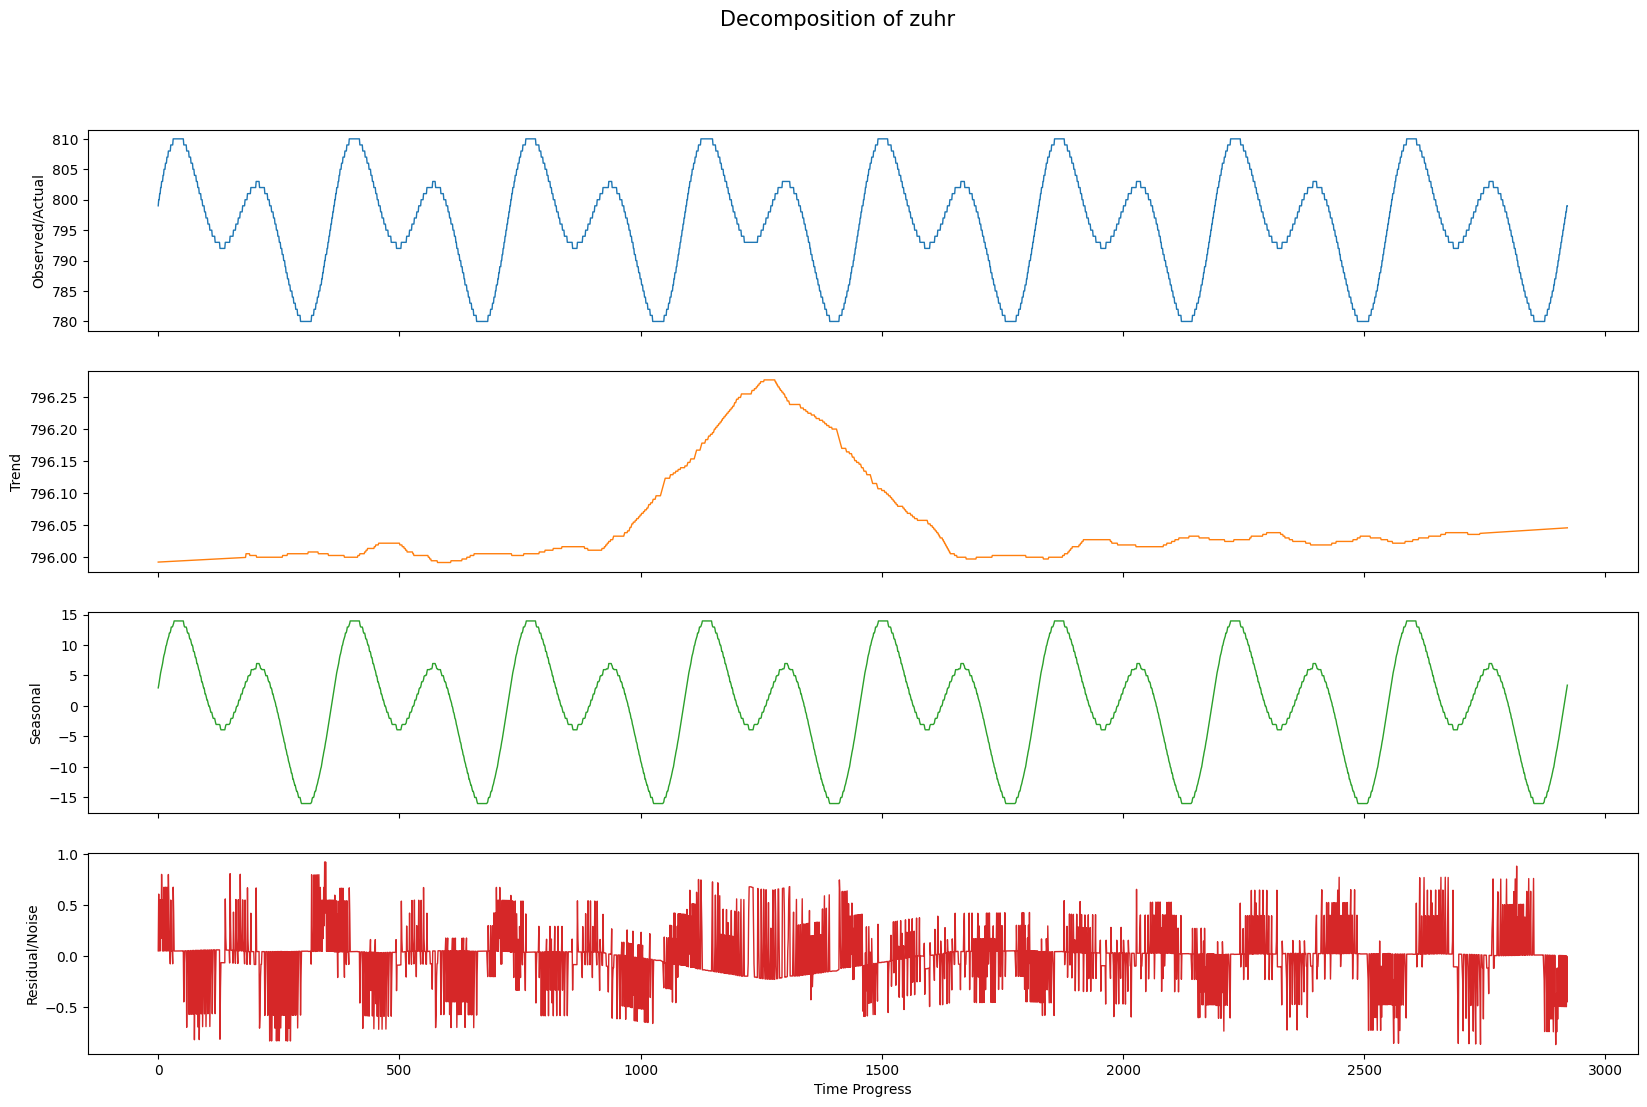

In [34]:
decompose_time_series_charts("zuhr")

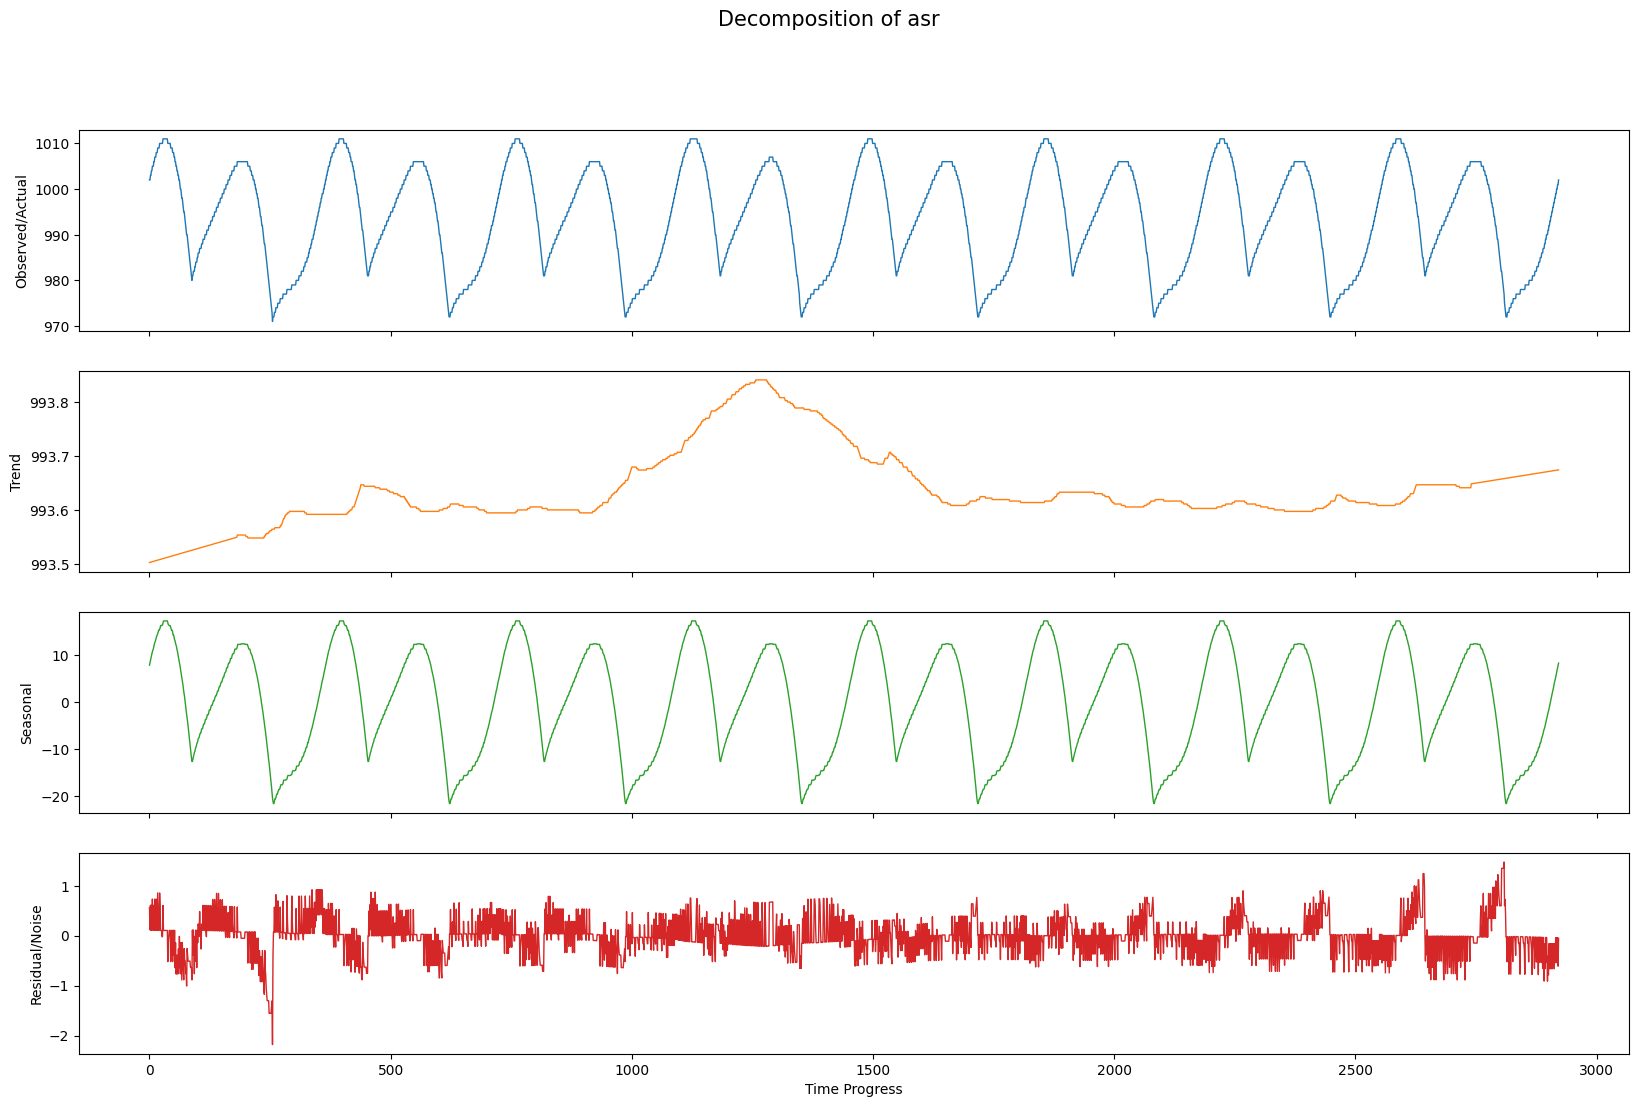

In [35]:
decompose_time_series_charts("asr")

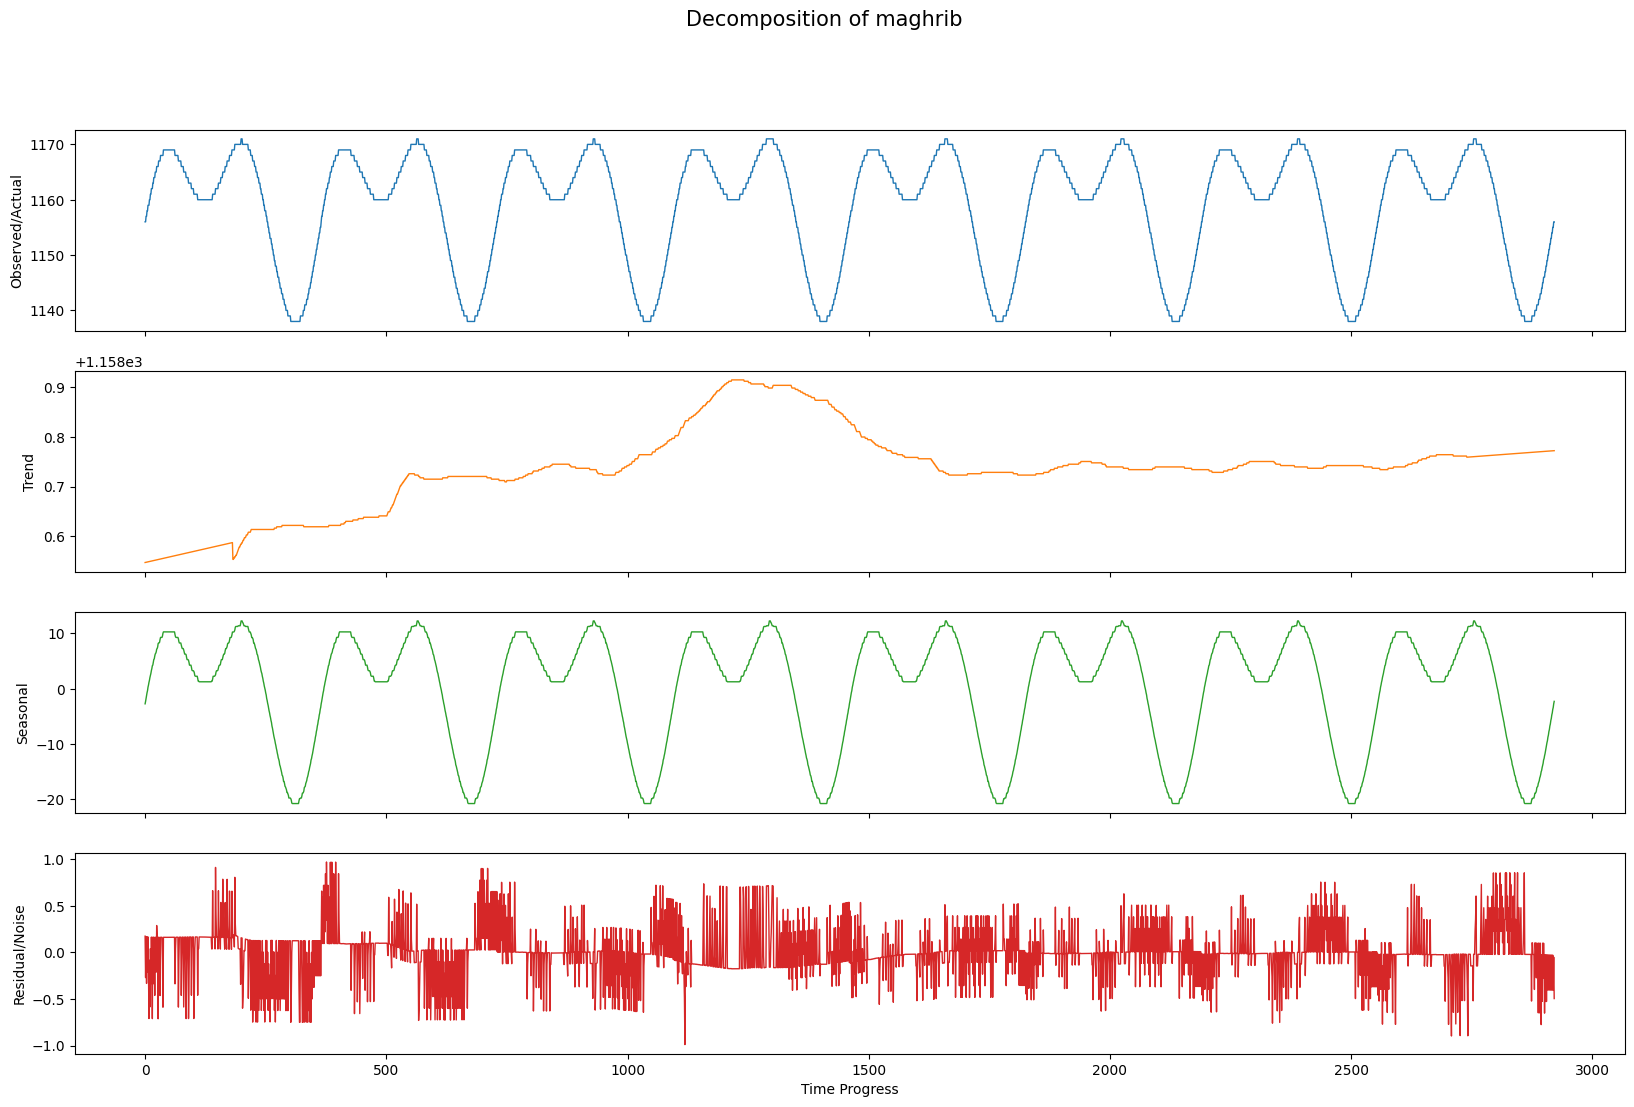

In [36]:
decompose_time_series_charts("maghrib")

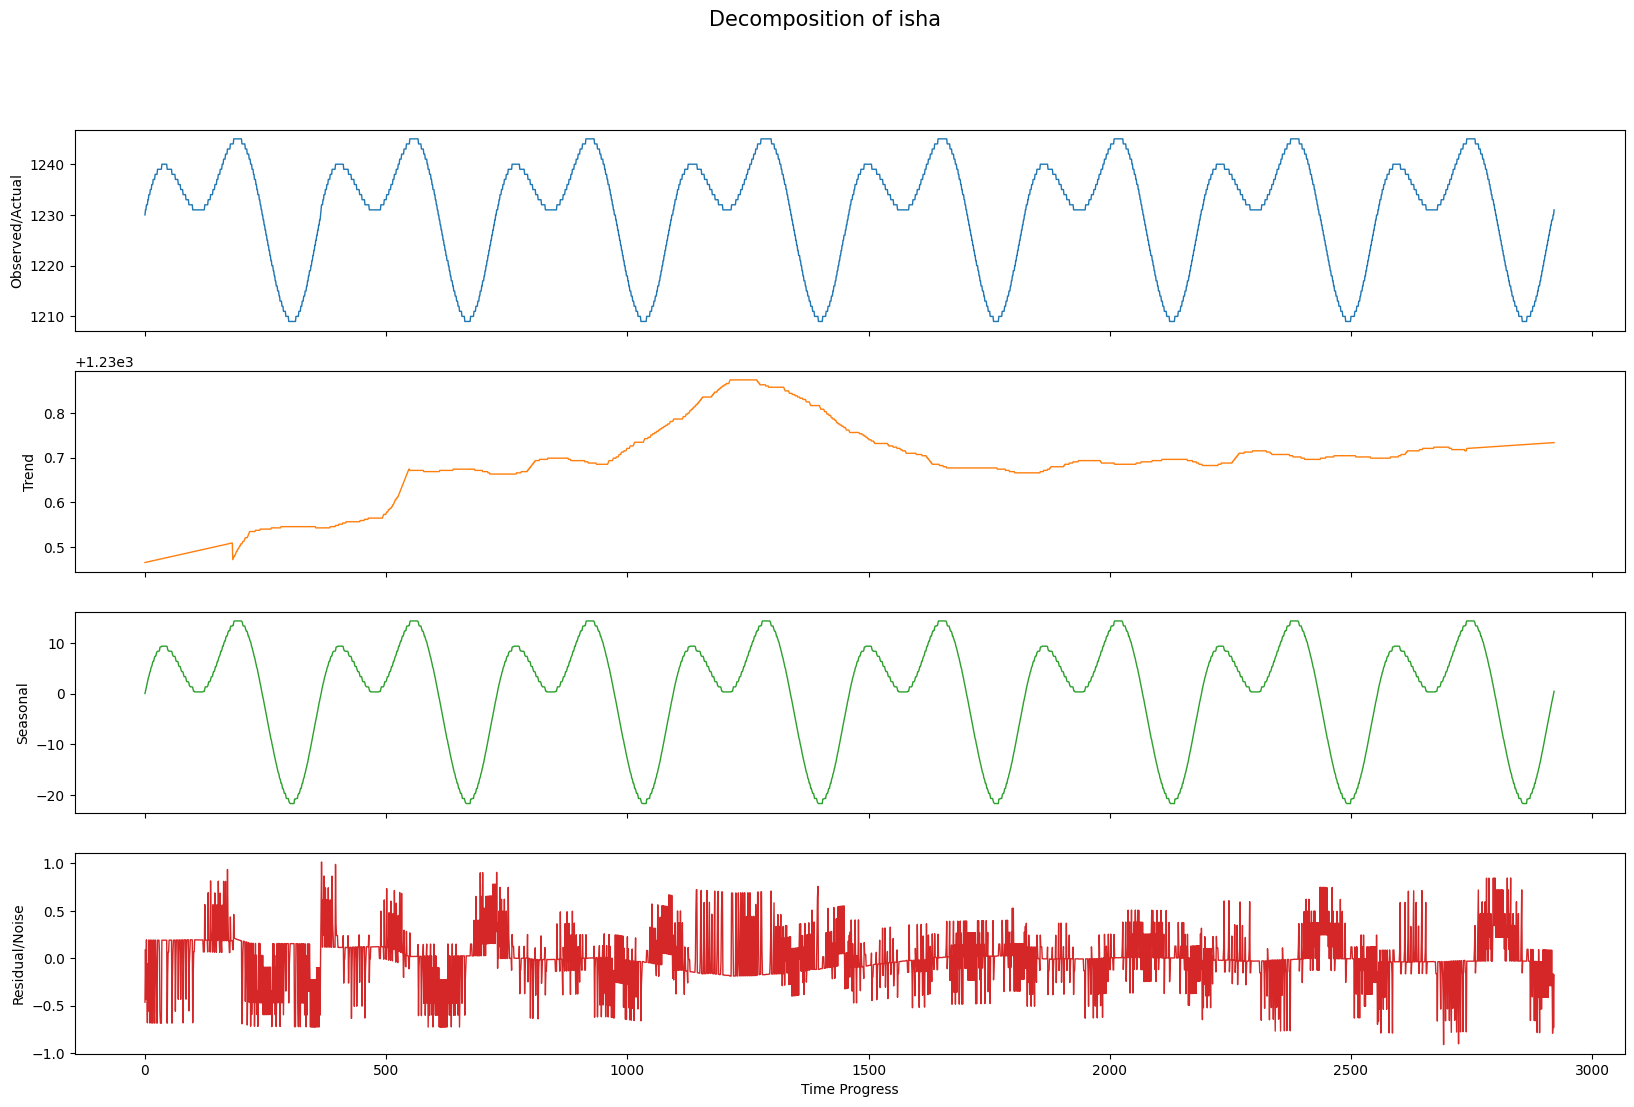

In [37]:
decompose_time_series_charts("isha")

<h4>Augmented Dickey-Fueller (ADF)</h4>
ADF is used to determine coefficient for differencing, d in ARIMA (Auto-Regressive Integrated Moving Average)

In [38]:
# First, check if time series is stationary or not
# H0: Time series is not stationary
# HA: Time series is stationary

def adf_test_plot(col_name):
    if col_name not in copiedEsolatDF2.columns:
        return

    f, ax = plt.subplots(figsize=(12,5))

    result = ADF(copiedEsolatDF2[col_name])
    conf_level = 0.05
    adf_stat = result[0]
    p_val = result[1]
    crit_1 = result[4]["1%"]
    crit_5 = result[4]["5%"]
    crit_10 = result[4]["10%"]

    if (p_val < conf_level) & (adf_stat < crit_1):
        linecolor = "C2"
    elif (p_val < conf_level) & (adf_stat < crit_5):
        linecolor = "gold"
    elif (p_val < conf_level) & (adf_stat < crit_10):
        linecolor = "C1"
    else:
        linecolor = "C3"
    
    sns.lineplot(data=copiedEsolatDF2, x="date", y=col_name, ax=ax, color=linecolor, linewidth=1)
    plt.title(
        f"ADF Statistic = {adf_stat:0.3f}\
        p-value = {p_val:0.3f}\
        \nCritical Values: 1% = {crit_1:0.3f}\
        5% = {crit_5:0.3f}\
        10% = {crit_10:0.3f}"
    )
    plt.show()

    p_test = bool(p_val < conf_level)
    adf_test_1 = bool(adf_stat < crit_1)
    adf_test_5 = bool(adf_stat < crit_5)
    adf_test_10 = bool(adf_stat < crit_10)

    print("=== Summary on Augmeneted Dickey-Fueller (ADF) Test ===")
    print("p-value < 0.05 : ", p_test)
    if p_test == True:
        print("H0 is REJECTED. Time series data is stationary.")
    else:
        print("Failed to reject H0. Time series data might not be stationary.")
    print()
    print("ADF Statistic < Critical Values")
    print("1% : ", adf_test_1)
    print("5% : ", adf_test_5)
    print("10% : ", adf_test_10)
    if (adf_test_1 == True) & (adf_test_5 == True) & (adf_test_10 == True):
        print("H0 is REJECTED. Time series data is stationary.")
    else:
        print("Failed to reject H0. Time series data might not be stationary.")
    print("=======================================================")

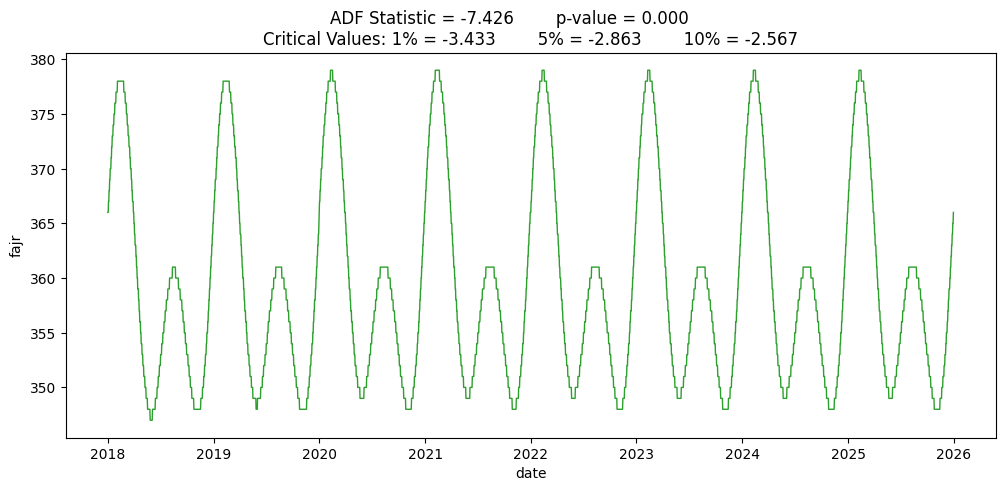

=== Summary on Augmeneted Dickey-Fueller (ADF) Test ===
p-value < 0.05 :  True
H0 is REJECTED. Time series data is stationary.

ADF Statistic < Critical Values
1% :  True
5% :  True
10% :  True
H0 is REJECTED. Time series data is stationary.


In [39]:
adf_test_plot("fajr")

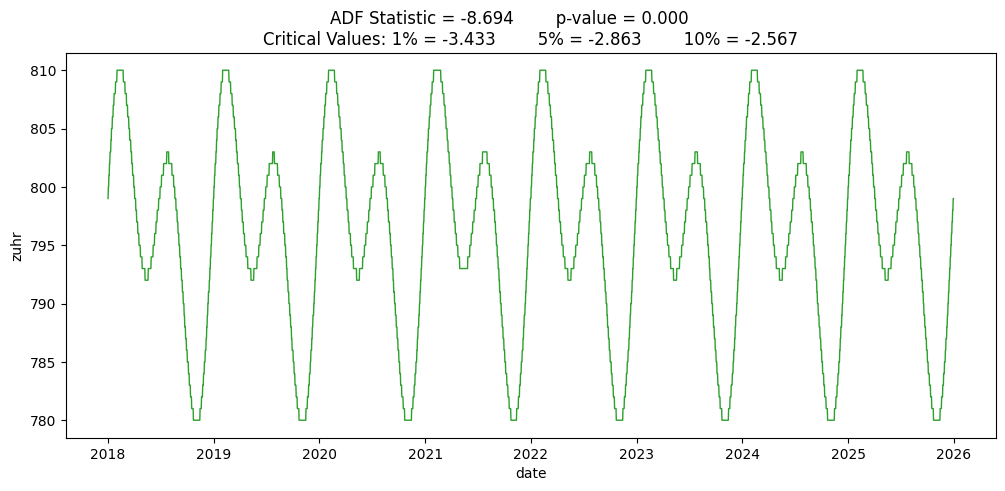

=== Summary on Augmeneted Dickey-Fueller (ADF) Test ===
p-value < 0.05 :  True
H0 is REJECTED. Time series data is stationary.

ADF Statistic < Critical Values
1% :  True
5% :  True
10% :  True
H0 is REJECTED. Time series data is stationary.


In [40]:
adf_test_plot("zuhr")

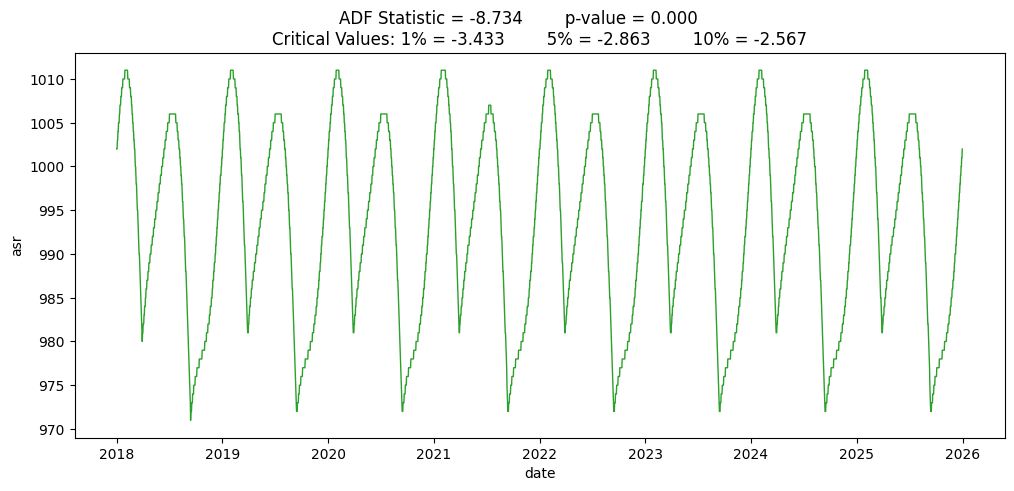

=== Summary on Augmeneted Dickey-Fueller (ADF) Test ===
p-value < 0.05 :  True
H0 is REJECTED. Time series data is stationary.

ADF Statistic < Critical Values
1% :  True
5% :  True
10% :  True
H0 is REJECTED. Time series data is stationary.


In [41]:
adf_test_plot("asr")

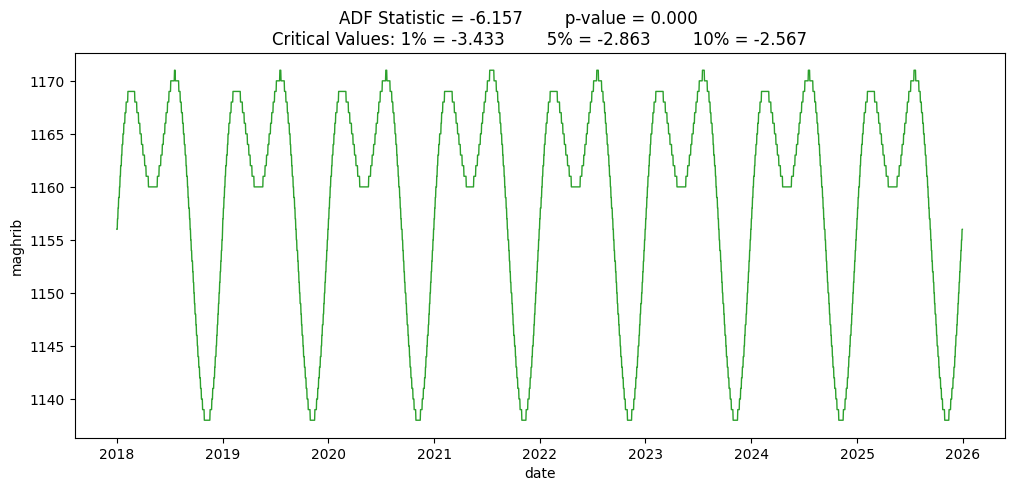

=== Summary on Augmeneted Dickey-Fueller (ADF) Test ===
p-value < 0.05 :  True
H0 is REJECTED. Time series data is stationary.

ADF Statistic < Critical Values
1% :  True
5% :  True
10% :  True
H0 is REJECTED. Time series data is stationary.


In [42]:
adf_test_plot("maghrib")

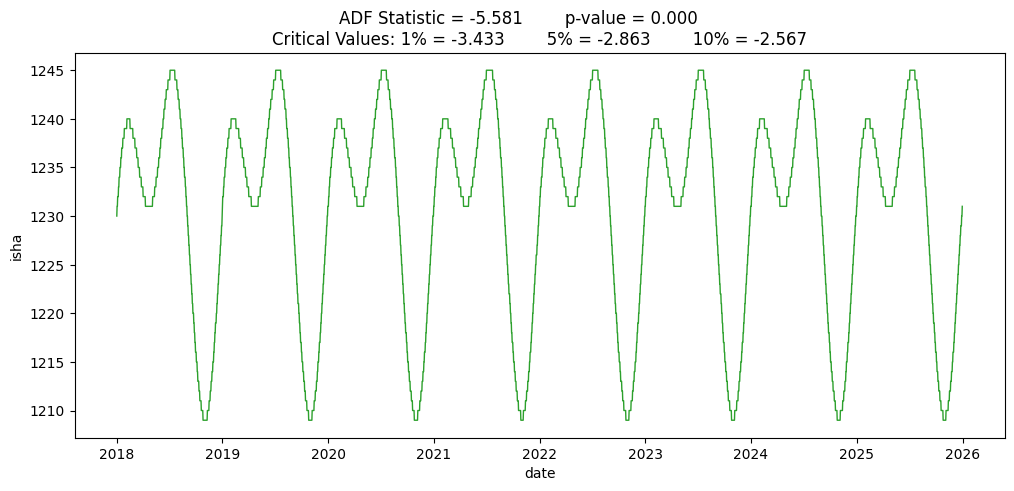

=== Summary on Augmeneted Dickey-Fueller (ADF) Test ===
p-value < 0.05 :  True
H0 is REJECTED. Time series data is stationary.

ADF Statistic < Critical Values
1% :  True
5% :  True
10% :  True
H0 is REJECTED. Time series data is stationary.


In [43]:
adf_test_plot("isha")

In [44]:
# Determine degree of differencing, d based on order of differencing
# e.g. if 1st order differencing already gives stationary, then d = 1

def differencing_time_series(col_name):
    if col_name not in copiedEsolatDF2.columns:
        return
    
    ts_diff_1 = np.diff(copiedEsolatDF2[col_name])
    ts_diff_1 = np.append(0, ts_diff_1)
    sd_1 = np.std(ts_diff_1)

    ts_diff_2 = np.diff(ts_diff_1)
    ts_diff_2 = np.append(0, ts_diff_2)
    sd_2 = np.std(ts_diff_2)

    ts_diff_3 = np.diff(ts_diff_2)
    ts_diff_3 = np.append(0, ts_diff_3)
    sd_3 = np.std(ts_diff_3)

    results = {"diff_order": [1, 2, 3], "std_dev": [sd_1, sd_2, sd_3]}
    df = pd.DataFrame.from_dict(results)
    print(df)

In [45]:
differencing_time_series("fajr")

   diff_order   std_dev
0           1  0.485942
1           2  0.685980
2           3  1.247722


In [46]:
differencing_time_series("zuhr")

   diff_order   std_dev
0           1  0.473095
1           2  0.669058
2           3  1.198762


In [47]:
differencing_time_series("asr")

   diff_order   std_dev
0           1  0.595442
1           2  0.710968
2           3  1.284750


In [48]:
differencing_time_series("maghrib")

   diff_order   std_dev
0           1  0.479562
1           2  0.677698
2           3  1.242775


In [49]:
differencing_time_series("isha")

   diff_order   std_dev
0           1  0.496738
1           2  0.701275
2           3  1.293246


Taking the lowest std_dev, 1st order of differencing gives lowest std_dev. Thus, d = 1.

<h4>Autocorrelation (ACF) and Partial Autocorrelation (PACF) Plots</h4>
For an ARIMA model, ACF is used to determine coefficient of lags for Moving Average, q, while PACF is used to determine coefficient of lags for Auto-Regressive, p.

In [50]:
def acf_plots():
    f, ax = plt.subplots(nrows=5, ncols=1, sharex=True, figsize=(15,10))
    f.suptitle("ACF Plots for e-Solat JAKIM time series", fontsize=15)

    for i in range(5):
        plot_acf(
            copiedEsolatDF2[copiedEsolatDF2.columns[i+1]],
            lags=100,
            ax=ax[i],
            title=None
        )
        ax[i].set_ylabel(copiedEsolatDF2.columns[i+1])

    ax[4].set_xlabel("Lags")
    plt.show()

def pacf_plots():
    f, ax = plt.subplots(nrows=5, ncols=1, figsize=(15,10))
    f.suptitle("PACF Plots for e-Solat JAKIM time series", fontsize = 15)
    
    for i in range(5):
        plot_pacf(
            copiedEsolatDF2[copiedEsolatDF2.columns[i+1]],
            lags=100,
            ax=ax[i],
            title=None
        )
        ax[i].set_ylabel(copiedEsolatDF2.columns[i+1])

    ax[4].set_xlabel("Lags")
    plt.show()

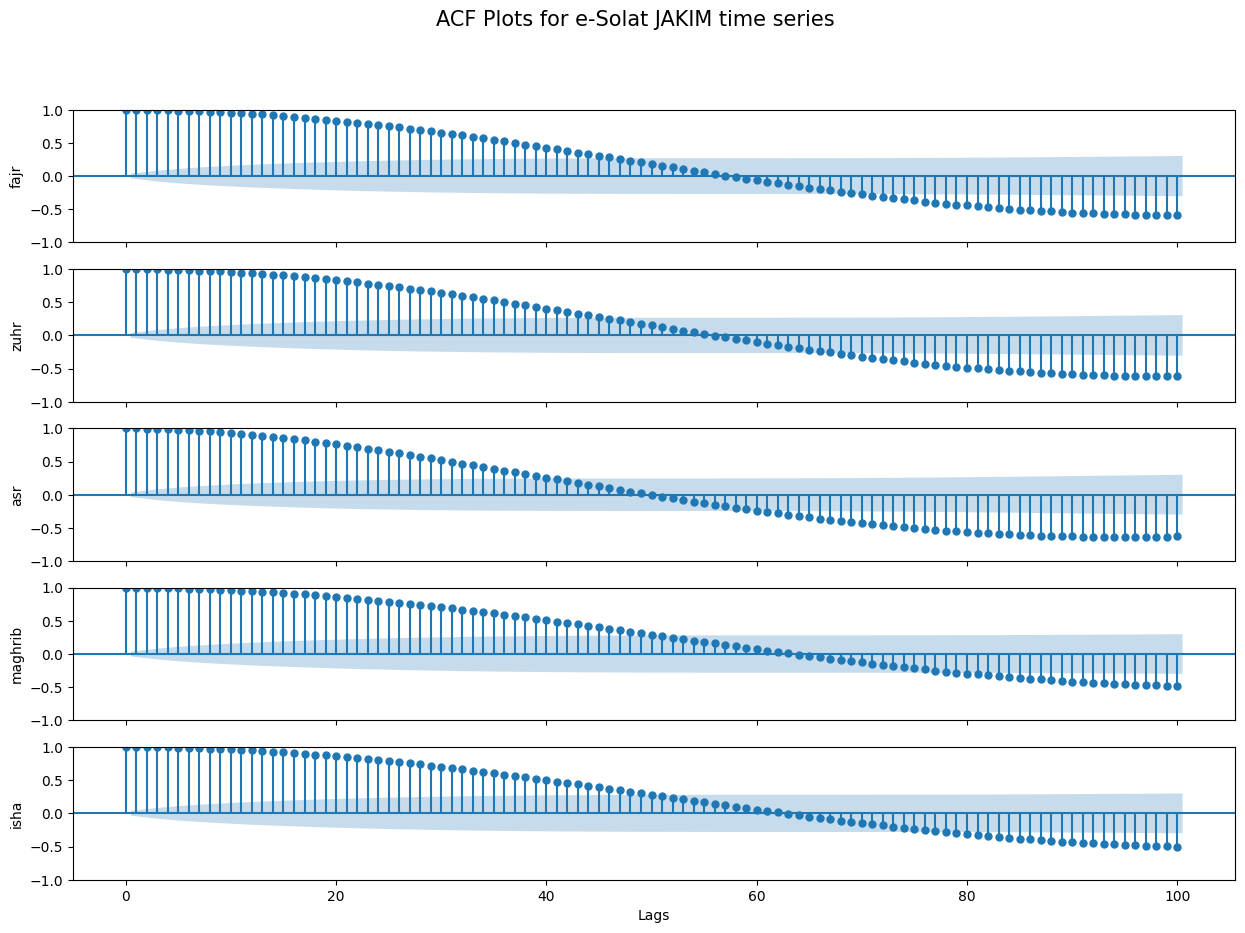

In [51]:
acf_plots()

ACF plots showing noises at different stages of lags, with fajr at 46th lag, zuhr at 45th lag, asr at 40th lag, maghrib and isha both at 50th lag. Thus,<br/>
q_fajr = 45, q_zuhr = 44, q_asr = 39, q_maghrib = 49, and q_isha = 49.


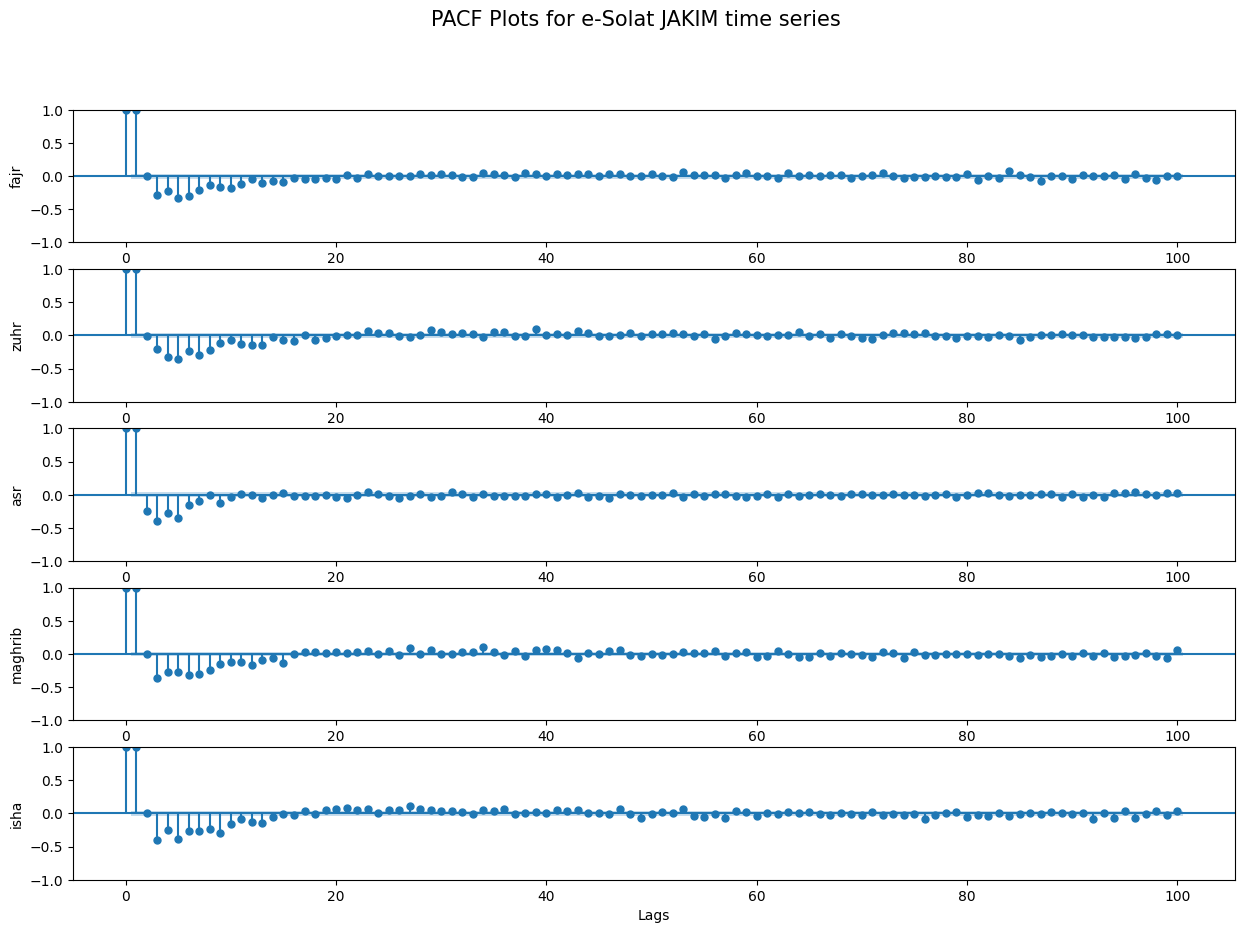

In [52]:
pacf_plots()

PACF plots start showing patterns of noises starting the 2nd lag. Hence, p = 1.

<h3>Data Normalization</h3>

In [53]:
normalizedEsolatDF = copiedEsolatDF2.copy()

for column in normalizedEsolatDF:
    if column == "date":
        continue
    
    normalizedEsolatDF[column] = (normalizedEsolatDF[column] - normalizedEsolatDF[column].min()) / (normalizedEsolatDF[column].max() - normalizedEsolatDF[column].min())

In [54]:
startValidation = datetime.date(2024, 1, 1)
startTest = datetime.date(2025, 1, 1)

In [55]:
train = normalizedEsolatDF.loc[normalizedEsolatDF["date"] < startValidation]
print(train.head())
print(train.tail())

         date     fajr      zuhr    asr   maghrib      isha
0  2018-01-01  0.59375  0.633333  0.775  0.545455  0.583333
1  2018-01-02  0.59375  0.666667  0.775  0.545455  0.611111
2  2018-01-03  0.62500  0.666667  0.800  0.575758  0.611111
3  2018-01-04  0.62500  0.700000  0.800  0.575758  0.638889
4  2018-01-05  0.65625  0.700000  0.825  0.606061  0.638889
            date     fajr      zuhr    asr   maghrib      isha
2186  2023-12-27  0.53125  0.566667  0.700  0.484848  0.555556
2187  2023-12-28  0.53125  0.566667  0.725  0.484848  0.555556
2188  2023-12-29  0.56250  0.600000  0.725  0.515152  0.583333
2189  2023-12-30  0.56250  0.600000  0.750  0.515152  0.583333
2190  2023-12-31  0.59375  0.633333  0.750  0.545455  0.611111


In [56]:
validation_mask = (normalizedEsolatDF["date"] >= startValidation) & (normalizedEsolatDF["date"] < startTest)
validation = normalizedEsolatDF.loc[validation_mask]
print(validation.head())
print(validation.tail())

            date     fajr      zuhr    asr   maghrib      isha
2191  2024-01-01  0.59375  0.633333  0.775  0.545455  0.611111
2192  2024-01-02  0.62500  0.666667  0.775  0.575758  0.611111
2193  2024-01-03  0.62500  0.666667  0.800  0.575758  0.638889
2194  2024-01-04  0.65625  0.700000  0.800  0.606061  0.638889
2195  2024-01-05  0.65625  0.700000  0.825  0.606061  0.666667
            date     fajr      zuhr    asr   maghrib      isha
2552  2024-12-27  0.53125  0.566667  0.725  0.484848  0.555556
2553  2024-12-28  0.56250  0.600000  0.725  0.515152  0.583333
2554  2024-12-29  0.56250  0.600000  0.750  0.515152  0.583333
2555  2024-12-30  0.59375  0.633333  0.750  0.545455  0.583333
2556  2024-12-31  0.59375  0.633333  0.775  0.545455  0.611111


In [57]:
test = normalizedEsolatDF.loc[normalizedEsolatDF["date"] >= startTest]
print(test.head())
print(test.tail())

            date     fajr      zuhr    asr   maghrib      isha
2557  2025-01-01  0.62500  0.666667  0.775  0.575758  0.611111
2558  2025-01-02  0.62500  0.666667  0.800  0.575758  0.638889
2559  2025-01-03  0.65625  0.700000  0.800  0.606061  0.638889
2560  2025-01-04  0.65625  0.700000  0.825  0.606061  0.666667
2561  2025-01-05  0.68750  0.700000  0.825  0.636364  0.666667
            date     fajr      zuhr    asr   maghrib      isha
2917  2025-12-27  0.53125  0.566667  0.725  0.484848  0.555556
2918  2025-12-28  0.53125  0.600000  0.725  0.515152  0.555556
2919  2025-12-29  0.56250  0.600000  0.750  0.515152  0.583333
2920  2025-12-30  0.56250  0.633333  0.750  0.545455  0.583333
2921  2025-12-31  0.59375  0.633333  0.775  0.545455  0.611111


Building the BRNN NAR Model using torchbnn

In [58]:
import torch
from torch import nn, optim

import torchbnn as bnn

In [59]:
model = nn.Sequential(
    bnn.BayesLinear(prior_mu=0, prior_sigma=0.1, in_features=2191, out_features=1),
    nn.ReLU(),
    bnn.BayesLinear(prior_mu=0, prior_sigma=0.1, in_features=1, out_features=2191)
)

mse_loss = nn.MSELoss()
kl_loss = bnn.BKLLoss(reduction="mean", last_layer_only=False)
kl_weight = 0.01

optimizer = optim.Adam(model.parameters(), lr=0.01)

In [60]:
x = torch.tensor(train["date"].index, dtype=int).float()
y = torch.tensor(train["zuhr"].values, dtype=float).float()

kl_weight = 0.1

for step in range(1000):
    pre = model(x)
    mse = mse_loss(pre, y)
    kl = kl_loss(model)
    cost = mse + (kl_weight * kl)

    optimizer.zero_grad()
    cost.backward()
    optimizer.step()

print(f"MSE: {mse.item():0.3f}, KL: {kl.item():0.3f}")

MSE: 0.288, KL: 5.703
